In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/ç')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Percobaan/Hasilsum.csv'

In [ ]:
df.head(5)

,id,text,gold_summary,tfidf_sum,bert_sum,tfidf_cos,bert_cos,tfidf_rouge1,tfidf_rouge2,bert_rouge1,bert_rouge2,tfidf_rougeL,bert_rougeL
0,0,"Dilaporkan dua orang terluka cukup serius, sem...",Seekor gajah mendadak mengamuk saat prosesi ta...,"Dilaporkan dua orang terluka cukup serius, sem...","Si gajah berlari tak tentu arah, menabrak sert...",0.867391,0.879436,0.546763,0.510949,0.514706,0.492537,0.546763,0.514706
1,1,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,Presiden Jokowi memutuskan untuk menghapus 14 ...,Pembangunan prasarana didengungkan sebagai uju...,"""Nah kriteria yang kita pakai adalah utamanya ...",0.890791,0.885239,0.685015,0.670769,0.580858,0.564784,0.685015,0.580858
2,2,Israel secara berkala menghancurkan rumah kelu...,Pihak keamanan Israel menghancurkan rumah tiga...,Para pria berumur 20-an tahun itu menyerang pa...,"Mereka menewaskan Hadar Cohen, 19 tahun, dan m...",0.931466,0.941844,0.653659,0.640394,0.633663,0.620000,0.653659,0.633663
3,3,Sebagian memandang Turnbull pelit. Dia adalah ...,Ada istilah 'tidak ada perbuatan baik yang tid...,Dan itulah yang terjadi saat Perdana Menteri A...,Dan itulah yang terjadi saat Perdana Menteri A...,0.899654,0.903567,0.659794,0.656250,0.624339,0.620321,0.659794,0.624339
4,4,Tommy Soeharto dan Titiek Soeharto merupakan k...,Diusulkannya Titiek Soeharto -putri mantan pre...,Tommy Soeharto dan Titiek Soeharto merupakan k...,Romantisme Orde Baru yang lekat dengan sosok s...,0.873362,0.866648,0.710526,0.699115,0.693333,0.690583,0.710526,0.693333


In [ ]:
# Cetak 5 ringkasan dari ketiga metode
for i in range(5):
    print(f"\n--- Summary Sample {i+1} ---")
    print(f"Summary:\n{df.loc[i, 'gold_summary']}")
    print(f"TF-IDF Summary:\n{df.loc[i, 'tfidf_sum']}")
    print(f"IndoBERT Summary:\n{df.loc[i, 'bert_sum']}")



--- Summary Sample 1 ---
Summary:
Seekor gajah mendadak mengamuk saat prosesi tahunan agama Buddha di Kolombo, Sri Lanka, sehingga membuat peserta upacara tunggang-langgang. Setidaknya 17 orang terluka.
TF-IDF Summary:
Dilaporkan dua orang terluka cukup serius, sementara sisanya sudah diperbolehkan pulang setelah mendapatkan perawatan. Si gajah berlari tak tentu arah, menabrak serta menginjak sebagian peserta upacara. Diduga gajah itu kaget oleh sesuatu di antara para peserta dan pengunjung.
IndoBERT Summary:
Si gajah berlari tak tentu arah, menabrak serta menginjak sebagian peserta upacara. Diduga gajah itu kaget oleh sesuatu di antara para peserta dan pengunjung. Media setempat melaporkan gajah lain yang juga mengamuk di prosesi berbeda.

--- Summary Sample 2 ---
Summary:
Presiden Jokowi memutuskan untuk menghapus 14 proyek dari daftar Proyek Stategis Nasional (PSN), setelah adanya evaluasi Komite Percepatan Penyediaan Infrastuktur Prioritas (KPPIP) Kementerian Koordinator Bidang Pe

In [ ]:
eval_df = pd.DataFrame(df)

eval_df['semantic_ambiguity'] = (
    (eval_df['bert_rouge1'] > 0.5) &
    (eval_df['bert_cos'] < 0.7)
)

eval_df['semantic_ambiguity_tfidf'] = (
    (eval_df['tfidf_rouge1'] > 0.5) &
    (eval_df['tfidf_cos'] < 0.7)
)


--- Average Evaluation Scores ---
TF-IDF Average ROUGE-1 F1: 0.6245
BERT Average ROUGE-1 F1: 0.5874
TF-IDF Average ROUGE-2 F1: 0.6109
BERT Average ROUGE-2 F1: 0.5733
TF-IDF Average ROUGE-L F1: 0.6245
BERT Average ROUGE-L F1: 0.5874
TF-IDF Average Cosine Similarity: 0.8538
BERT Average Cosine Similarity: 0.8637


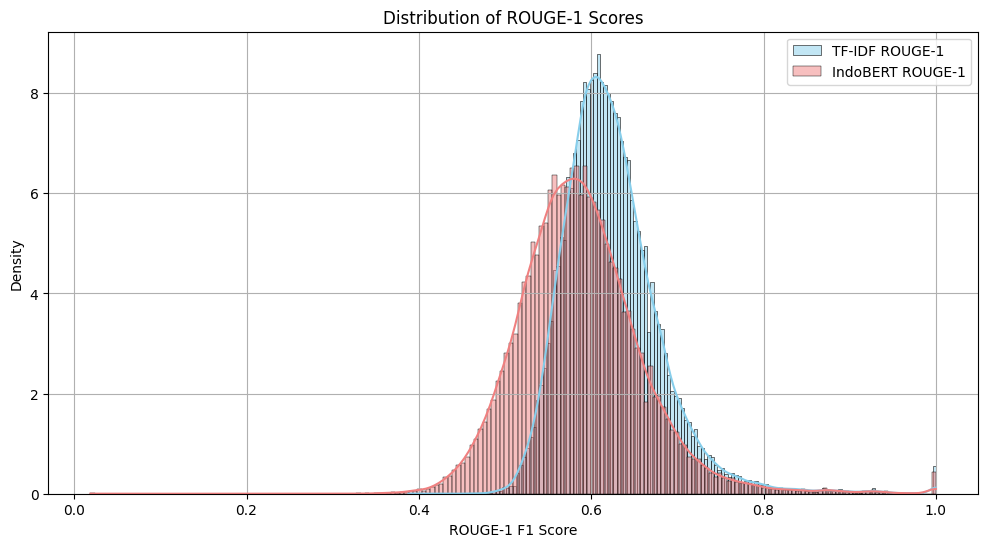

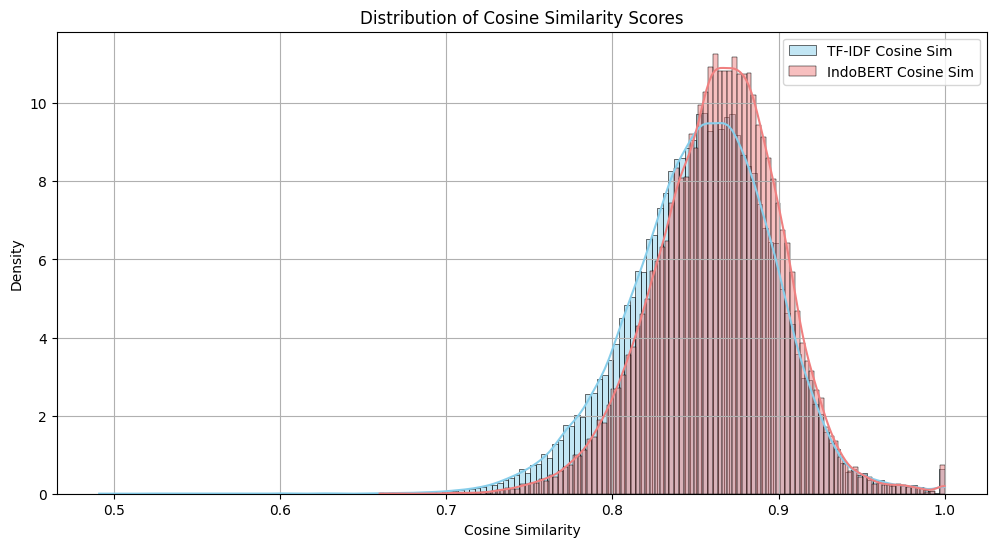


--- Semantic Ambiguity Count Comparison ---
Number of IndoBERT Ambiguity Cases: 2
Number of TF-IDF Ambiguity Cases: 58

--- Example TF-IDF Ambiguity Cases ---
                                                   text  \
395   Job Centre, tempat orang mendaftarkan diri men...   
618   Presiden Joko Widodo (kanan) berbincang dengan...   
804   Pico Iyer: “Tantangan terbesar dari perjalanan...   
1179  Kisah Xiao Yang dan Chen Chen menjadi tajuk pe...   
1358  Hal yang tidak dapat dihindari. Sebelum saya m...   

                                              tfidf_sum  tfidf_rouge1  \
395   Pemerintah koalisi pimpinan Konservatif lewat ...      0.600683   
618   Presiden Joko Widodo (kanan) berbincang dengan...      0.558824   
804   Saya tidak memikirkan hal ini secara sadar ket...      0.556474   
1179  Kisah Xiao Yang dan Chen Chen menjadi tajuk pe...      0.623853   
1358  Penundaan yang kronis bahkan dapat memperburuk...      0.556818   

      tfidf_cos  
395    0.699387  
618    0.6

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Display average ROUGE and Cosine Similarity scores for TF-IDF and BERT
print("\n--- Average Evaluation Scores ---")
print(f"TF-IDF Average ROUGE-1 F1: {eval_df['tfidf_rouge1'].mean():.4f}")
print(f"BERT Average ROUGE-1 F1: {eval_df['bert_rouge1'].mean():.4f}")
print(f"TF-IDF Average ROUGE-2 F1: {eval_df['tfidf_rouge2'].mean():.4f}")
print(f"BERT Average ROUGE-2 F1: {eval_df['bert_rouge2'].mean():.4f}")
print(f"TF-IDF Average ROUGE-L F1: {eval_df['tfidf_rougeL'].mean():.4f}")
print(f"BERT Average ROUGE-L F1: {eval_df['bert_rougeL'].mean():.4f}")
print(f"TF-IDF Average Cosine Similarity: {eval_df['tfidf_cos'].mean():.4f}")
print(f"BERT Average Cosine Similarity: {eval_df['bert_cos'].mean():.4f}")

# Plot the distribution of ROUGE-1 scores
plt.figure(figsize=(12, 6))
sns.histplot(eval_df, x='tfidf_rouge1', color='skyblue', label='TF-IDF ROUGE-1', kde=True, stat='density', common_norm=False)
sns.histplot(eval_df, x='bert_rouge1', color='lightcoral', label='IndoBERT ROUGE-1', kde=True, stat='density', common_norm=False)
plt.title('Distribution of ROUGE-1 Scores')
plt.xlabel('ROUGE-1 F1 Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of Cosine Similarity scores
plt.figure(figsize=(12, 6))
sns.histplot(eval_df, x='tfidf_cos', color='skyblue', label='TF-IDF Cosine Sim', kde=True, stat='density', common_norm=False)
sns.histplot(eval_df, x='bert_cos', color='lightcoral', label='IndoBERT Cosine Sim', kde=True, stat='density', common_norm=False)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Compare the number of identified ambiguity cases
print("\n--- Semantic Ambiguity Count Comparison ---")
print(f"Number of IndoBERT Ambiguity Cases: {eval_df['semantic_ambiguity'].sum()}")
print(f"Number of TF-IDF Ambiguity Cases: {eval_df['semantic_ambiguity_tfidf'].sum()}")

# Further exploration of ambiguity cases (optional)
print("\n--- Example TF-IDF Ambiguity Cases ---")
ambiguity_cases_tfidf = eval_df[eval_df['semantic_ambiguity_tfidf'] == True]
print(ambiguity_cases_tfidf[['text', 'tfidf_sum', 'tfidf_rouge1', 'tfidf_cos']].head(5))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/TFIDF-IndoBERT.csv')

Mounted at /content/drive


In [ ]:
df.head(5)

,id,text,gold_summary,tfidf_sum,bert_sum,tfidf_cos,bert_cos,tfidf_rouge1,bert_rouge1,tfidf_rouge2,bert_rouge2,tfidf_rougeL,bert_rougeL
0,0,"Dilaporkan dua orang terluka cukup serius, sem...",Seekor gajah mendadak mengamuk saat prosesi ta...,"Dilaporkan dua orang terluka cukup serius, sem...","Si gajah berlari tak tentu arah, menabrak sert...",0.867391,0.879436,0.546763,0.514706,0.510949,0.492537,0.546763,0.514706
1,1,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,Presiden Jokowi memutuskan untuk menghapus 14 ...,Pembangunan prasarana didengungkan sebagai uju...,"""Nah kriteria yang kita pakai adalah utamanya ...",0.890791,0.885239,0.685015,0.580858,0.670769,0.564784,0.685015,0.580858
2,2,Israel secara berkala menghancurkan rumah kelu...,Pihak keamanan Israel menghancurkan rumah tiga...,Para pria berumur 20-an tahun itu menyerang pa...,"Mereka menewaskan Hadar Cohen, 19 tahun, dan m...",0.931466,0.941844,0.653659,0.633663,0.640394,0.620000,0.653659,0.633663
3,3,Sebagian memandang Turnbull pelit. Dia adalah ...,Ada istilah 'tidak ada perbuatan baik yang tid...,Dan itulah yang terjadi saat Perdana Menteri A...,Dan itulah yang terjadi saat Perdana Menteri A...,0.899654,0.903567,0.659794,0.624339,0.656250,0.620321,0.659794,0.624339
4,4,Tommy Soeharto dan Titiek Soeharto merupakan k...,Diusulkannya Titiek Soeharto -putri mantan pre...,Tommy Soeharto dan Titiek Soeharto merupakan k...,Romantisme Orde Baru yang lekat dengan sosok s...,0.873362,0.866648,0.710526,0.693333,0.699115,0.690583,0.710526,0.693333


In [ ]:
eval_df = pd.DataFrame(df)

eval_df['semantic_ambiguity'] = (
    (eval_df['bert_rouge1'] > 0.5) &
    (eval_df['bert_cos'] < 0.7)
)

eval_df['semantic_ambiguity_tfidf'] = (
    (eval_df['tfidf_rouge1'] > 0.5) &
    (eval_df['tfidf_cos'] < 0.7)
)


--- Average Evaluation Scores ---
TF-IDF Average ROUGE-1 F1: 0.6245
BERT Average ROUGE-1 F1: 0.5874
TF-IDF Average ROUGE-2 F1: 0.6109
BERT Average ROUGE-2 F1: 0.5733
TF-IDF Average ROUGE-L F1: 0.6245
BERT Average ROUGE-L F1: 0.5874
TF-IDF Average Cosine Similarity: 0.8538
BERT Average Cosine Similarity: 0.8637


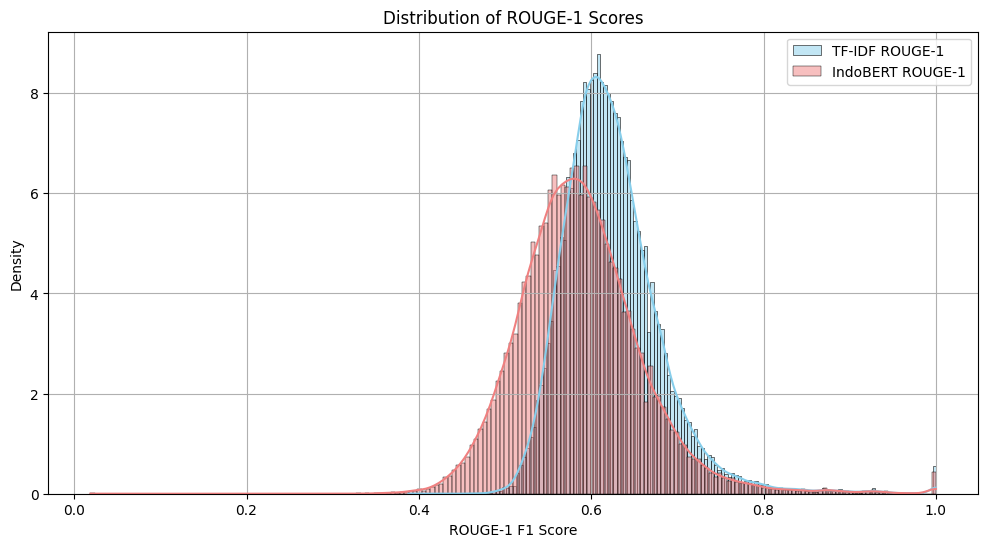

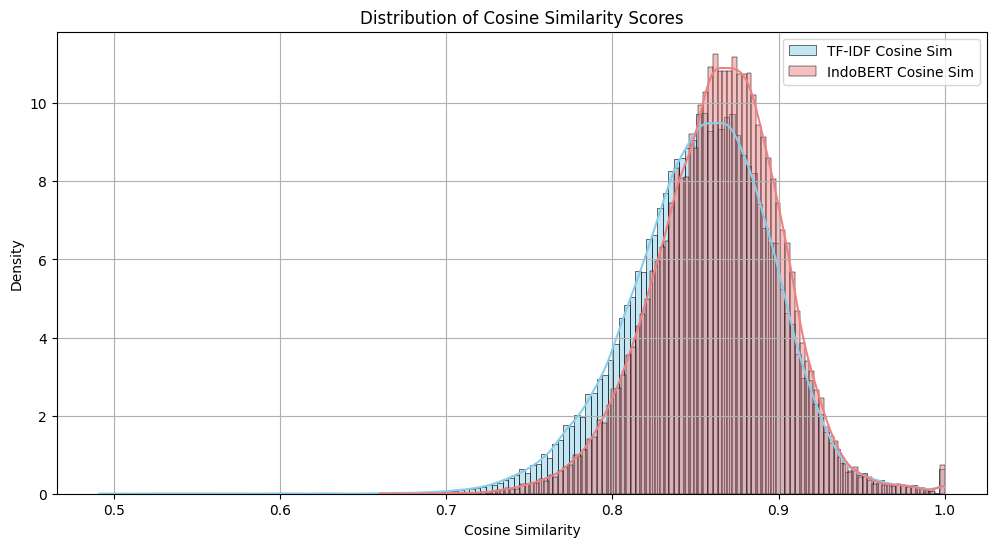


--- Semantic Ambiguity Count Comparison ---
Number of IndoBERT Ambiguity Cases: 2
Number of TF-IDF Ambiguity Cases: 58

--- Example TF-IDF Ambiguity Cases ---
                                                   text  \
395   Job Centre, tempat orang mendaftarkan diri men...   
618   Presiden Joko Widodo (kanan) berbincang dengan...   
804   Pico Iyer: “Tantangan terbesar dari perjalanan...   
1179  Kisah Xiao Yang dan Chen Chen menjadi tajuk pe...   
1358  Hal yang tidak dapat dihindari. Sebelum saya m...   

                                              tfidf_sum  tfidf_rouge1  \
395   Pemerintah koalisi pimpinan Konservatif lewat ...      0.600683   
618   Presiden Joko Widodo (kanan) berbincang dengan...      0.558824   
804   Saya tidak memikirkan hal ini secara sadar ket...      0.556474   
1179  Kisah Xiao Yang dan Chen Chen menjadi tajuk pe...      0.623853   
1358  Penundaan yang kronis bahkan dapat memperburuk...      0.556818   

      tfidf_cos  
395    0.699387  
618    0.6

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Display average ROUGE and Cosine Similarity scores for TF-IDF and BERT
print("\n--- Average Evaluation Scores ---")
print(f"TF-IDF Average ROUGE-1 F1: {eval_df['tfidf_rouge1'].mean():.4f}")
print(f"BERT Average ROUGE-1 F1: {eval_df['bert_rouge1'].mean():.4f}")
print(f"TF-IDF Average ROUGE-2 F1: {eval_df['tfidf_rouge2'].mean():.4f}")
print(f"BERT Average ROUGE-2 F1: {eval_df['bert_rouge2'].mean():.4f}")
print(f"TF-IDF Average ROUGE-L F1: {eval_df['tfidf_rougeL'].mean():.4f}")
print(f"BERT Average ROUGE-L F1: {eval_df['bert_rougeL'].mean():.4f}")
print(f"TF-IDF Average Cosine Similarity: {eval_df['tfidf_cos'].mean():.4f}")
print(f"BERT Average Cosine Similarity: {eval_df['bert_cos'].mean():.4f}")

# Plot the distribution of ROUGE-1 scores
plt.figure(figsize=(12, 6))
sns.histplot(eval_df, x='tfidf_rouge1', color='skyblue', label='TF-IDF ROUGE-1', kde=True, stat='density', common_norm=False)
sns.histplot(eval_df, x='bert_rouge1', color='lightcoral', label='IndoBERT ROUGE-1', kde=True, stat='density', common_norm=False)
plt.title('Distribution of ROUGE-1 Scores')
plt.xlabel('ROUGE-1 F1 Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of Cosine Similarity scores
plt.figure(figsize=(12, 6))
sns.histplot(eval_df, x='tfidf_cos', color='skyblue', label='TF-IDF Cosine Sim', kde=True, stat='density', common_norm=False)
sns.histplot(eval_df, x='bert_cos', color='lightcoral', label='IndoBERT Cosine Sim', kde=True, stat='density', common_norm=False)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Compare the number of identified ambiguity cases
print("\n--- Semantic Ambiguity Count Comparison ---")
print(f"Number of IndoBERT Ambiguity Cases: {eval_df['semantic_ambiguity'].sum()}")
print(f"Number of TF-IDF Ambiguity Cases: {eval_df['semantic_ambiguity_tfidf'].sum()}")

# Further exploration of ambiguity cases (optional)
print("\n--- Example TF-IDF Ambiguity Cases ---")
ambiguity_cases_tfidf = eval_df[eval_df['semantic_ambiguity_tfidf'] == True]
print(ambiguity_cases_tfidf[['text', 'tfidf_sum', 'tfidf_rouge1', 'tfidf_cos']].head(5))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/gpt.csv')

Mounted at /content/drive


In [ ]:
df.head(5)

,index,text,ref_summary,gpt_summary,cosine_ref,cosine_gpt,rouge1,rouge2,rougeL,rougeLsum
0,0,"Dilaporkan dua orang terluka cukup serius, sem...",Seekor gajah mendadak mengamuk saat prosesi ta...,"Sri Lanka, memiliki gajah adalah simbol status...",0.753957,0.488761,0.105263,0.036364,0.070175,0.070175
1,1,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,Presiden Jokowi memutuskan untuk menghapus 14 ...,Ringkas teks berikut dalam pemerintahan Presid...,0.639277,0.539970,0.088235,0.000000,0.088235,0.088235
2,2,Israel secara berkala menghancurkan rumah kelu...,Pihak keamanan Israel menghancurkan rumah tiga...,Anggota menewaskan seorang polisi wanita pada ...,0.709025,0.832567,0.043478,0.000000,0.043478,0.043478
3,3,Sebagian memandang Turnbull pelit. Dia adalah ...,Ada istilah 'tidak ada perbuatan baik yang tid...,tindakan tindakan kecil kemuraan hati ini sege...,0.367458,0.437209,0.000000,0.000000,0.000000,0.000000
4,4,Tommy Soeharto dan Titiek Soeharto merupakan k...,Diusulkannya Titiek Soeharto -putri mantan pre...,"Menurutnya, dinasti Soeharto memiliki kans unt...",0.580246,0.563826,0.108108,0.057143,0.108108,0.108108


In [ ]:
eval_df = pd.DataFrame(df)

eval_df['semantic_ambiguity'] = (
    (eval_df['rouge1'] > 0.5) &
    (eval_df['cosine_gpt'] < 0.7)
)


--- Average Evaluation Scores ---
Average ROUGE-1 F1: 0.1229
Average ROUGE-2 F1: 0.0262
Average ROUGE-L F1: 0.0954
Average ROUGE-Lsum F1: 0.0954
Average Cosine Similarity (Ref): 0.6273
Average Cosine Similarity (GPT): 0.5899


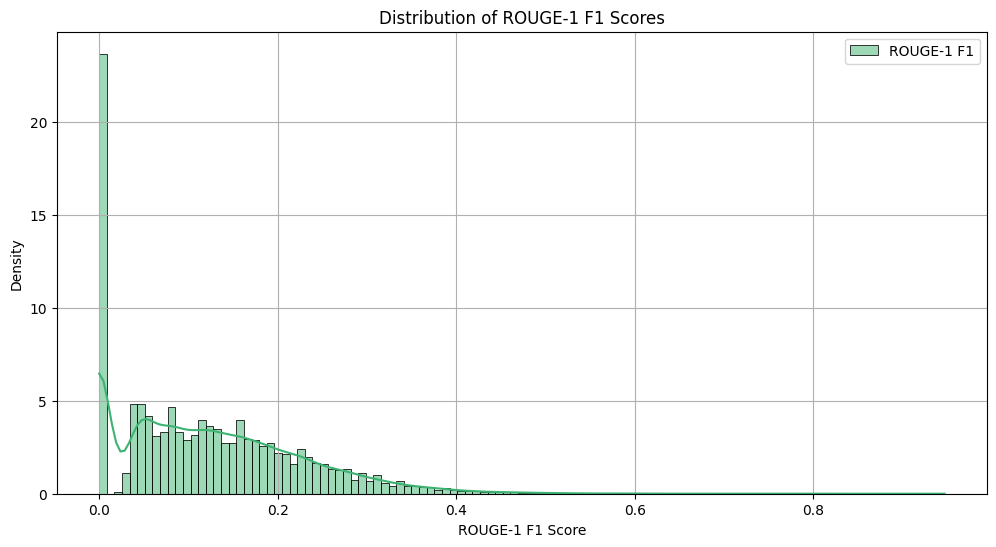

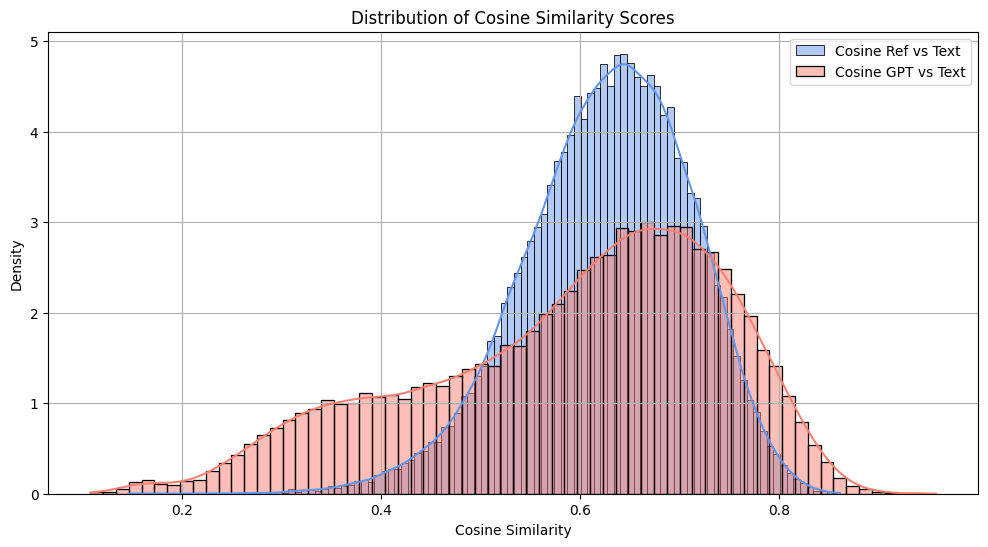

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display average ROUGE and Cosine Similarity scores
print("\n--- Average Evaluation Scores ---")
print(f"Average ROUGE-1 F1: {eval_df['rouge1'].mean():.4f}")
print(f"Average ROUGE-2 F1: {eval_df['rouge2'].mean():.4f}")
print(f"Average ROUGE-L F1: {eval_df['rougeL'].mean():.4f}")
print(f"Average ROUGE-Lsum F1: {eval_df['rougeLsum'].mean():.4f}")
print(f"Average Cosine Similarity (Ref): {eval_df['cosine_ref'].mean():.4f}")
print(f"Average Cosine Similarity (GPT): {eval_df['cosine_gpt'].mean():.4f}")

# Plot the distribution of ROUGE-1 scores
plt.figure(figsize=(12, 6))
sns.histplot(eval_df['rouge1'], color='mediumseagreen', label='ROUGE-1 F1', kde=True, stat='density')
plt.title('Distribution of ROUGE-1 F1 Scores')
plt.xlabel('ROUGE-1 F1 Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of Cosine Similarity scores
plt.figure(figsize=(12, 6))
sns.histplot(eval_df['cosine_ref'], color='cornflowerblue', label='Cosine Ref vs Text', kde=True, stat='density')
sns.histplot(eval_df['cosine_gpt'], color='salmon', label='Cosine GPT vs Text', kde=True, stat='density')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


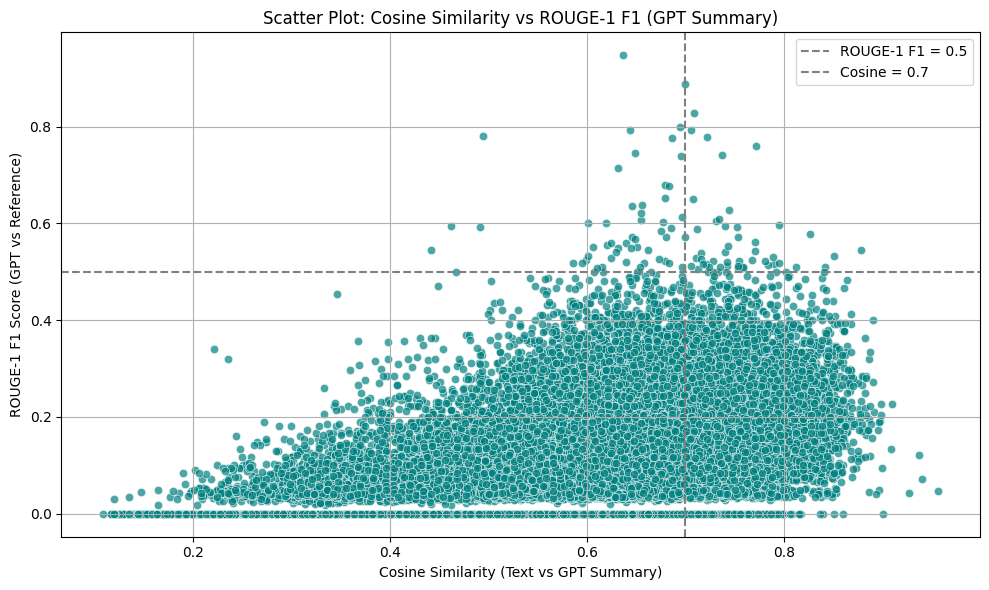

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=eval_df,
    x='cosine_gpt',
    y='rouge1',
    color='teal',
    alpha=0.7
)
plt.axhline(0.5, linestyle='--', color='gray', label='ROUGE-1 F1 = 0.5')
plt.axvline(0.7, linestyle='--', color='gray', label='Cosine = 0.7')
plt.title("Scatter Plot: Cosine Similarity vs ROUGE-1 F1 (GPT Summary)")
plt.xlabel("Cosine Similarity (Text vs GPT Summary)")
plt.ylabel("ROUGE-1 F1 Score (GPT vs Reference)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan rata-rata ROUGE-1, ROUGE-2, dan ROUGE-L
print("\n--- Rata-rata Skor ROUGE ---")
print(f"Rata-rata ROUGE-1 F1 : {eval_df['rouge1'].mean():.4f}")
print(f"Rata-rata ROUGE-2 F1 : {eval_df['rouge2'].mean():.4f}")
print(f"Rata-rata ROUGE-L F1 : {eval_df['rougeL'].mean():.4f}")



--- Rata-rata Skor ROUGE ---
Rata-rata ROUGE-1 F1 : 0.1229
Rata-rata ROUGE-2 F1 : 0.0262
Rata-rata ROUGE-L F1 : 0.0954


In [ ]:
print(f"Rata-rata ROUGE-Lsum F1 : {eval_df['rougeLsum'].mean():.4f}")


Rata-rata ROUGE-Lsum F1 : 0.0954


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/gpt.csv')

Mounted at /content/drive


In [ ]:
df.head(5)

,index,text,ref_summary,gpt_summary,cosine_ref,cosine_gpt,rouge1,rouge2,rougeL,rougeLsum
0,0,"Dilaporkan dua orang terluka cukup serius, sem...",Seekor gajah mendadak mengamuk saat prosesi ta...,"Sri Lanka, memiliki gajah adalah simbol status...",0.753957,0.488761,0.105263,0.036364,0.070175,0.070175
1,1,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,Presiden Jokowi memutuskan untuk menghapus 14 ...,Ringkas teks berikut dalam pemerintahan Presid...,0.639277,0.539970,0.088235,0.000000,0.088235,0.088235
2,2,Israel secara berkala menghancurkan rumah kelu...,Pihak keamanan Israel menghancurkan rumah tiga...,Anggota menewaskan seorang polisi wanita pada ...,0.709025,0.832567,0.043478,0.000000,0.043478,0.043478
3,3,Sebagian memandang Turnbull pelit. Dia adalah ...,Ada istilah 'tidak ada perbuatan baik yang tid...,tindakan tindakan kecil kemuraan hati ini sege...,0.367458,0.437209,0.000000,0.000000,0.000000,0.000000
4,4,Tommy Soeharto dan Titiek Soeharto merupakan k...,Diusulkannya Titiek Soeharto -putri mantan pre...,"Menurutnya, dinasti Soeharto memiliki kans unt...",0.580246,0.563826,0.108108,0.057143,0.108108,0.108108


In [ ]:
eval_df = pd.DataFrame(df)

eval_df['semantic_ambiguity'] = (
    (eval_df['rouge1'] > 0.5) &
    (eval_df['cosine_similarity'] < 0.7)
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/TFIDF.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,text,reference_summary,generated_summary,cosine_similarity,rouge1_f1,rouge2_f1,rougeL_f1
0,"Dilaporkan dua orang terluka cukup serius, sem...",Seekor gajah mendadak mengamuk saat prosesi ta...,"Dilaporkan dua orang terluka cukup serius, sem...",0.667700,0.160361,0.037116,0.107027
1,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,Presiden Jokowi memutuskan untuk menghapus 14 ...,Pembangunan prasarana didengungkan sebagai uju...,0.816054,0.160361,0.037116,0.107027
2,Israel secara berkala menghancurkan rumah kelu...,Pihak keamanan Israel menghancurkan rumah tiga...,Para pria berumur 20-an tahun itu menyerang pa...,0.772855,0.160361,0.037116,0.107027
3,Sebagian memandang Turnbull pelit. Dia adalah ...,Ada istilah 'tidak ada perbuatan baik yang tid...,Dan itulah yang terjadi saat Perdana Menteri A...,0.412590,0.160361,0.037116,0.107027
4,Tommy Soeharto dan Titiek Soeharto merupakan k...,Diusulkannya Titiek Soeharto -putri mantan pre...,Tommy Suharto menjabat sebagai ketua umum Part...,0.611820,0.160361,0.037116,0.107027


In [ ]:
eval_df = pd.DataFrame(df)

eval_df['semantic_ambiguity'] = (
    (eval_df['rouge1'] > 0.5) &
    (eval_df['cosine_similarity'] < 0.7)
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/modelgpt.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,index,gold_summary,tfidf_summary,indobert_summary,gpt_summary,tfidf_cosine,tfidf_rouge1_precision,tfidf_rouge1_recall,tfidf_rouge1_f1,tfidf_rouge2_precision,...,gpt_cosine,gpt_rouge1_precision,gpt_rouge1_recall,gpt_rouge1_f1,gpt_rouge2_precision,gpt_rouge2_recall,gpt_rouge2_f1,gpt_rougeL_precision,gpt_rougeL_recall,gpt_rougeL_f1
0,784,Pemerintah AS terus mendukung negara-negara di...,Pengungsi Rohingya di Birem Bayeun Aceh Timur ...,Pengungsi Rohingya di Birem Bayeun Aceh Timur ...,Pengungsi Rohingya di Birem Bayeun Aceh Timur ...,0.850704,0.370000,0.822222,0.510345,0.191919,...,0.860216,0.4,0.711111,0.512000,0.253165,0.454545,0.325203,0.3,0.533333,0.384000
1,3498,"Mochamad Iriawan, atau biasa disapa Iwan Bule,...","Mochamad Iriawan, atau biasa disapa Iwan Bule,...","Mochamad Iriawan, atau biasa disapa Iwan Bule,...","Mochamad Iriawan, atau biasa disapa Iwan Bule,...",0.836036,0.378049,0.939394,0.539130,0.370370,...,0.875115,0.5,0.939394,0.652632,0.491803,0.937500,0.645161,0.5,0.939394,0.652632


In [ ]:
import pandas as pd

# Misalnya df sudah berisi data Anda
eval_df = pd.DataFrame(df)

# Menghitung rata-rata ROUGE untuk TF-IDF
tfidf_rouge_avg = {
    'tfidf_rouge1_precision_avg': eval_df['tfidf_rouge1_precision'].mean(),
    'tfidf_rouge1_recall_avg': eval_df['tfidf_rouge1_recall'].mean(),
    'tfidf_rouge1_f1_avg': eval_df['tfidf_rouge1_f1'].mean(),
    'tfidf_rouge2_precision_avg': eval_df['tfidf_rouge2_precision'].mean(),
    'tfidf_rouge2_recall_avg': eval_df['tfidf_rouge2_recall'].mean(),
    'tfidf_rouge2_f1_avg': eval_df['tfidf_rouge2_f1'].mean(),
}

# Menghitung rata-rata ROUGE untuk GPT
gpt_rouge_avg = {
    'gpt_rouge1_precision_avg': eval_df['gpt_rouge1_precision'].mean(),
    'gpt_rouge1_recall_avg': eval_df['gpt_rouge1_recall'].mean(),
    'gpt_rouge1_f1_avg': eval_df['gpt_rouge1_f1'].mean(),
    'gpt_rouge2_precision_avg': eval_df['gpt_rouge2_precision'].mean(),
    'gpt_rouge2_recall_avg': eval_df['gpt_rouge2_recall'].mean(),
    'gpt_rouge2_f1_avg': eval_df['gpt_rouge2_f1'].mean(),
    'gpt_rougeL_precision_avg': eval_df['gpt_rougeL_precision'].mean(),
    'gpt_rougeL_recall_avg': eval_df['gpt_rougeL_recall'].mean(),
    'gpt_rougeL_f1_avg': eval_df['gpt_rougeL_f1'].mean(),
}

# Jika ada kolom untuk Indobert, tambahkan juga (misalnya: indobert_rouge1_f1, dll.)
indobert_rouge_avg = {}
if 'indobert_rouge1_precision' in eval_df.columns:
    indobert_rouge_avg = {
        'indobert_rouge1_precision_avg': eval_df['indobert_rouge1_precision'].mean(),
        'indobert_rouge1_recall_avg': eval_df['indobert_rouge1_recall'].mean(),
        'indobert_rouge1_f1_avg': eval_df['indobert_rouge1_f1'].mean(),
        'indobert_rouge2_precision_avg': eval_df['indobert_rouge2_precision'].mean(),
        'indobert_rouge2_recall_avg': eval_df['indobert_rouge2_recall'].mean(),
        'indobert_rouge2_f1_avg': eval_df['indobert_rouge2_f1'].mean(),
        'indobert_rougeL_precision_avg': eval_df['indobert_rougeL_precision'].mean(),
        'indobert_rougeL_recall_avg': eval_df['indobert_rougeL_recall'].mean(),
        'indobert_rougeL_f1_avg': eval_df['indobert_rougeL_f1'].mean(),
    }

# Gabungkan semua hasil rata-rata ke satu dictionary
rouge_summary = {
    'TFIDF': tfidf_rouge_avg,
    'IndoBERT': indobert_rouge_avg,
    'GPT': gpt_rouge_avg
}

# Tampilkan hasilnya
for model, metrics in rouge_summary.items():
    print(f"\n=== {model} ROUGE Average ===")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")



=== TFIDF ROUGE Average ===
tfidf_rouge1_precision_avg: 0.3740
tfidf_rouge1_recall_avg: 0.8808
tfidf_rouge1_f1_avg: 0.5247
tfidf_rouge2_precision_avg: 0.2811
tfidf_rouge2_recall_avg: 0.6847
tfidf_rouge2_f1_avg: 0.3984

=== IndoBERT ROUGE Average ===
indobert_rouge1_precision_avg: 0.3740
indobert_rouge1_recall_avg: 0.8808
indobert_rouge1_f1_avg: 0.5247
indobert_rouge2_precision_avg: 0.2811
indobert_rouge2_recall_avg: 0.6847
indobert_rouge2_f1_avg: 0.3984
indobert_rougeL_precision_avg: 0.3290
indobert_rougeL_recall_avg: 0.7808
indobert_rougeL_f1_avg: 0.4627

=== GPT ROUGE Average ===
gpt_rouge1_precision_avg: 0.4500
gpt_rouge1_recall_avg: 0.8253
gpt_rouge1_f1_avg: 0.5823
gpt_rouge2_precision_avg: 0.3725
gpt_rouge2_recall_avg: 0.6960
gpt_rouge2_f1_avg: 0.4852
gpt_rougeL_precision_avg: 0.4000
gpt_rougeL_recall_avg: 0.7364
gpt_rougeL_f1_avg: 0.5183


In [ ]:
import pandas as pd

# Misalnya df sudah berisi data Anda
eval_df = pd.DataFrame(df)

# Menghitung rata-rata ROUGE untuk TF-IDF
tfidf_rouge_avg = {
    'tfidf_rouge1_precision_avg': eval_df['tfidf_rouge1_precision'].mean(),
    'tfidf_rouge1_recall_avg': eval_df['tfidf_rouge1_recall'].mean(),
    'tfidf_rouge1_f1_avg': eval_df['tfidf_rouge1_f1'].mean(),
    'tfidf_rouge2_precision_avg': eval_df['tfidf_rouge2_precision'].mean(),
    'tfidf_rouge2_recall_avg': eval_df['tfidf_rouge2_recall'].mean(),
    'tfidf_rouge2_f1_avg': eval_df['tfidf_rouge2_f1'].mean(),
    'tfidf_cosine_avg': eval_df['tfidf_cosine'].mean()  # Tambahan Cosine TF-IDF
}

# Menghitung rata-rata ROUGE untuk GPT
gpt_rouge_avg = {
    'gpt_rouge1_precision_avg': eval_df['gpt_rouge1_precision'].mean(),
    'gpt_rouge1_recall_avg': eval_df['gpt_rouge1_recall'].mean(),
    'gpt_rouge1_f1_avg': eval_df['gpt_rouge1_f1'].mean(),
    'gpt_rouge2_precision_avg': eval_df['gpt_rouge2_precision'].mean(),
    'gpt_rouge2_recall_avg': eval_df['gpt_rouge2_recall'].mean(),
    'gpt_rouge2_f1_avg': eval_df['gpt_rouge2_f1'].mean(),
    'gpt_rougeL_precision_avg': eval_df['gpt_rougeL_precision'].mean(),
    'gpt_rougeL_recall_avg': eval_df['gpt_rougeL_recall'].mean(),
    'gpt_rougeL_f1_avg': eval_df['gpt_rougeL_f1'].mean(),
    'gpt_cosine_avg': eval_df['gpt_cosine'].mean()  # Tambahan Cosine GPT
}

# ROUGE dan Cosine untuk IndoBERT (jika kolomnya tersedia)
indobert_rouge_avg = {}
if 'indobert_rouge1_precision' in eval_df.columns:
    indobert_rouge_avg = {
        'indobert_rouge1_precision_avg': eval_df['indobert_rouge1_precision'].mean(),
        'indobert_rouge1_recall_avg': eval_df['indobert_rouge1_recall'].mean(),
        'indobert_rouge1_f1_avg': eval_df['indobert_rouge1_f1'].mean(),
        'indobert_rouge2_precision_avg': eval_df['indobert_rouge2_precision'].mean(),
        'indobert_rouge2_recall_avg': eval_df['indobert_rouge2_recall'].mean(),
        'indobert_rouge2_f1_avg': eval_df['indobert_rouge2_f1'].mean(),
        'indobert_rougeL_precision_avg': eval_df['indobert_rougeL_precision'].mean(),
        'indobert_rougeL_recall_avg': eval_df['indobert_rougeL_recall'].mean(),
        'indobert_rougeL_f1_avg': eval_df['indobert_rougeL_f1'].mean(),
        'indobert_cosine_avg': eval_df['indobert_cosine'].mean()  # Tambahan Cosine IndoBERT
    }

# Gabungkan semua hasil rata-rata ke satu dictionary
summary = {
    'TFIDF': tfidf_rouge_avg,
    'IndoBERT': indobert_rouge_avg,
    'GPT': gpt_rouge_avg
}

# Tampilkan hasil
for model, metrics in summary.items():
    print(f"\n=== {model} Average Evaluation ===")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")



=== TFIDF Average Evaluation ===
tfidf_rouge1_precision_avg: 0.3740
tfidf_rouge1_recall_avg: 0.8808
tfidf_rouge1_f1_avg: 0.5247
tfidf_rouge2_precision_avg: 0.2811
tfidf_rouge2_recall_avg: 0.6847
tfidf_rouge2_f1_avg: 0.3984
tfidf_cosine_avg: 0.8434

=== IndoBERT Average Evaluation ===
indobert_rouge1_precision_avg: 0.3740
indobert_rouge1_recall_avg: 0.8808
indobert_rouge1_f1_avg: 0.5247
indobert_rouge2_precision_avg: 0.2811
indobert_rouge2_recall_avg: 0.6847
indobert_rouge2_f1_avg: 0.3984
indobert_rougeL_precision_avg: 0.3290
indobert_rougeL_recall_avg: 0.7808
indobert_rougeL_f1_avg: 0.4627
indobert_cosine_avg: 0.8434

=== GPT Average Evaluation ===
gpt_rouge1_precision_avg: 0.4500
gpt_rouge1_recall_avg: 0.8253
gpt_rouge1_f1_avg: 0.5823
gpt_rouge2_precision_avg: 0.3725
gpt_rouge2_recall_avg: 0.6960
gpt_rouge2_f1_avg: 0.4852
gpt_rougeL_precision_avg: 0.4000
gpt_rougeL_recall_avg: 0.7364
gpt_rougeL_f1_avg: 0.5183
gpt_cosine_avg: 0.8677


In [ ]:
eval_df = pd.DataFrame(df)

eval_df['semantic_ambiguity'] = (
    (eval_df['gpt_rouge1_f1'] > 0.5) &
    (eval_df['gpt_cosine'] < 0.7)
)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan eval_df adalah DataFrame kamu
# Visualisasi distribusi ambiguitas semantik IndoBERT
plt.figure(figsize=(8, 5))
sns.countplot(x='semantic_ambiguity', data=eval_df, palette='viridis')
plt.title('Comparison of Semantic Ambiguity Cases (IndoBERT)')
plt.xlabel('Semantic Ambiguity')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ambiguous', 'Ambiguous'])
plt.grid(axis='y')
plt.show()

# Visualisasi distribusi ambiguitas semantik TF-IDF
plt.figure(figsize=(8, 5))
sns.countplot(x='semantic_ambiguity', data=eval_df, palette='viridis')
plt.title('Comparison of Semantic Ambiguity Cases (TF-IDF)')
plt.xlabel('Semantic Ambiguity')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ambiguous', 'Ambiguous'])
plt.grid(axis='y')
plt.show()

# Scatterplot ROUGE-1 vs Cosine untuk masing-masing model
plt.figure(figsize=(14, 6))

# TF-IDF
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=eval_df,
    x='gpt_cosine',
    y='gpt_rouge1_f1',
    hue='semantic_ambiguity',
    palette='coolwarm',
    alpha=0.6
)
plt.title('TF-IDF: ROUGE-1 vs Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('ROUGE-1 F1 Score')
plt.axvline(x=0.7, color='r', linestyle='--', label='Cosine Threshold')
plt.axhline(y=0.5, color='g', linestyle='--', label='ROUGE-1 Threshold')
plt.legend(title='Ambiguity', labels=['Not Ambiguous', 'Ambiguous'])
plt.grid(True)

# IndoBERT
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=eval_df,
    x='indobert_cosine',
    y='indobert_rouge1_f1',
    hue='semantic_ambiguity',
    palette='coolwarm',
    alpha=0.6
)
plt.title('IndoBERT: ROUGE-1 vs Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('ROUGE-1 F1 Score')
plt.axvline(x=0.7, color='r', linestyle='--', label='Cosine Threshold')
plt.axhline(y=0.5, color='g', linestyle='--', label='ROUGE-1 Threshold')
plt.legend(title='Ambiguity', labels=['Not Ambiguous', 'Ambiguous'])
plt.grid(True)

plt.tight_layout()
plt.show()


ValueError: Could not interpret value `semantic_ambiguity` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [ ]:
import pandas as pd

# Misalnya df sudah berisi data Anda
eval_df = pd.DataFrame(df)

# Menghitung rata-rata ROUGE untuk TF-IDF
tfidf_rouge_avg = {
    'tfidf_rouge1_precision_avg': eval_df['tfidf_rouge1_precision'].mean(),
    'tfidf_rouge1_recall_avg': eval_df['tfidf_rouge1_recall'].mean(),
    'tfidf_rouge1_f1_avg': eval_df['tfidf_rouge1_f1'].mean(),
    'tfidf_rouge2_precision_avg': eval_df['tfidf_rouge2_precision'].mean(),
    'tfidf_rouge2_recall_avg': eval_df['tfidf_rouge2_recall'].mean(),
    'tfidf_rouge2_f1_avg': eval_df['tfidf_rouge2_f1'].mean(),
}

# Menghitung rata-rata ROUGE untuk GPT
gpt_rouge_avg = {
    'gpt_rouge1_precision_avg': eval_df['gpt_rouge1_precision'].mean(),
    'gpt_rouge1_recall_avg': eval_df['gpt_rouge1_recall'].mean(),
    'gpt_rouge1_f1_avg': eval_df['gpt_rouge1_f1'].mean(),
    'gpt_rouge2_precision_avg': eval_df['gpt_rouge2_precision'].mean(),
    'gpt_rouge2_recall_avg': eval_df['gpt_rouge2_recall'].mean(),
    'gpt_rouge2_f1_avg': eval_df['gpt_rouge2_f1'].mean(),
    'gpt_rougeL_precision_avg': eval_df['gpt_rougeL_precision'].mean(),
    'gpt_rougeL_recall_avg': eval_df['gpt_rougeL_recall'].mean(),
    'gpt_rougeL_f1_avg': eval_df['gpt_rougeL_f1'].mean(),
}

# Jika ada kolom untuk Indobert, tambahkan juga (misalnya: indobert_rouge1_f1, dll.)
indobert_rouge_avg = {}
if 'indobert_rouge1_precision' in eval_df.columns:
    indobert_rouge_avg = {
        'indobert_rouge1_precision_avg': eval_df['indobert_rouge1_precision'].mean(),
        'indobert_rouge1_recall_avg': eval_df['indobert_rouge1_recall'].mean(),
        'indobert_rouge1_f1_avg': eval_df['indobert_rouge1_f1'].mean(),
        'indobert_rouge2_precision_avg': eval_df['indobert_rouge2_precision'].mean(),
        'indobert_rouge2_recall_avg': eval_df['indobert_rouge2_recall'].mean(),
        'indobert_rouge2_f1_avg': eval_df['indobert_rouge2_f1'].mean(),
        'indobert_rougeL_precision_avg': eval_df['indobert_rougeL_precision'].mean(),
        'indobert_rougeL_recall_avg': eval_df['indobert_rougeL_recall'].mean(),
        'indobert_rougeL_f1_avg': eval_df['indobert_rougeL_f1'].mean(),
    }

# Gabungkan semua hasil rata-rata ke satu dictionary
rouge_summary = {
    'TFIDF': tfidf_rouge_avg,
    'IndoBERT': indobert_rouge_avg,
    'GPT': gpt_rouge_avg
}

# Tampilkan hasilnya
for model, metrics in rouge_summary.items():
    print(f"\n=== {model} ROUGE Average ===")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")



=== TFIDF ROUGE Average ===
tfidf_rouge1_precision_avg: 0.3740
tfidf_rouge1_recall_avg: 0.8808
tfidf_rouge1_f1_avg: 0.5247
tfidf_rouge2_precision_avg: 0.2811
tfidf_rouge2_recall_avg: 0.6847
tfidf_rouge2_f1_avg: 0.3984

=== IndoBERT ROUGE Average ===
indobert_rouge1_precision_avg: 0.3740
indobert_rouge1_recall_avg: 0.8808
indobert_rouge1_f1_avg: 0.5247
indobert_rouge2_precision_avg: 0.2811
indobert_rouge2_recall_avg: 0.6847
indobert_rouge2_f1_avg: 0.3984
indobert_rougeL_precision_avg: 0.3290
indobert_rougeL_recall_avg: 0.7808
indobert_rougeL_f1_avg: 0.4627

=== GPT ROUGE Average ===
gpt_rouge1_precision_avg: 0.4500
gpt_rouge1_recall_avg: 0.8253
gpt_rouge1_f1_avg: 0.5823
gpt_rouge2_precision_avg: 0.3725
gpt_rouge2_recall_avg: 0.6960
gpt_rouge2_f1_avg: 0.4852
gpt_rougeL_precision_avg: 0.4000
gpt_rougeL_recall_avg: 0.7364
gpt_rougeL_f1_avg: 0.5183


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/TFIDF.csv')

Mounted at /content/drive


In [ ]:
df.head(5)

,text,reference_summary,generated_summary,cosine_similarity,rouge1_f1,rouge2_f1,rougeL_f1
0,"Dilaporkan dua orang terluka cukup serius, sem...",Seekor gajah mendadak mengamuk saat prosesi ta...,"Dilaporkan dua orang terluka cukup serius, sem...",0.667700,0.160361,0.037116,0.107027
1,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,Presiden Jokowi memutuskan untuk menghapus 14 ...,Pembangunan prasarana didengungkan sebagai uju...,0.816054,0.160361,0.037116,0.107027
2,Israel secara berkala menghancurkan rumah kelu...,Pihak keamanan Israel menghancurkan rumah tiga...,Para pria berumur 20-an tahun itu menyerang pa...,0.772855,0.160361,0.037116,0.107027
3,Sebagian memandang Turnbull pelit. Dia adalah ...,Ada istilah 'tidak ada perbuatan baik yang tid...,Dan itulah yang terjadi saat Perdana Menteri A...,0.412590,0.160361,0.037116,0.107027
4,Tommy Soeharto dan Titiek Soeharto merupakan k...,Diusulkannya Titiek Soeharto -putri mantan pre...,Tommy Suharto menjabat sebagai ketua umum Part...,0.611820,0.160361,0.037116,0.107027


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/Summary+Cosine.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,id,text,gold_summary,tfidf_sum,bert_sum,tfidf_cos,bert_cos,tfidf_rouge1,tfidf_rouge2,bert_rouge1,bert_rouge2,tfidf_rougeL,bert_rougeL
0,0,"Dilaporkan dua orang terluka cukup serius, sem...",Seekor gajah mendadak mengamuk saat prosesi ta...,"Dilaporkan dua orang terluka cukup serius, sem...","Si gajah berlari tak tentu arah, menabrak sert...",0.867391,0.879436,0.546763,0.510949,0.514706,0.492537,0.546763,0.514706
1,1,Proyek MRT Sudirman- Lebak Bulus tengah dikerj...,Presiden Jokowi memutuskan untuk menghapus 14 ...,Pembangunan prasarana didengungkan sebagai uju...,"""Nah kriteria yang kita pakai adalah utamanya ...",0.890791,0.885239,0.685015,0.670769,0.580858,0.564784,0.685015,0.580858
2,2,Israel secara berkala menghancurkan rumah kelu...,Pihak keamanan Israel menghancurkan rumah tiga...,Para pria berumur 20-an tahun itu menyerang pa...,"Mereka menewaskan Hadar Cohen, 19 tahun, dan m...",0.931466,0.941844,0.653659,0.640394,0.633663,0.620000,0.653659,0.633663
3,3,Sebagian memandang Turnbull pelit. Dia adalah ...,Ada istilah 'tidak ada perbuatan baik yang tid...,Dan itulah yang terjadi saat Perdana Menteri A...,Dan itulah yang terjadi saat Perdana Menteri A...,0.899654,0.903567,0.659794,0.656250,0.624339,0.620321,0.659794,0.624339
4,4,Tommy Soeharto dan Titiek Soeharto merupakan k...,Diusulkannya Titiek Soeharto -putri mantan pre...,Tommy Soeharto dan Titiek Soeharto merupakan k...,Romantisme Orde Baru yang lekat dengan sosok s...,0.873362,0.866648,0.710526,0.699115,0.693333,0.690583,0.710526,0.693333


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Percobaan/withgpt.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,index,gold_summary,tfidf_summary,indobert_summary,gpt_summary,tfidf_cosine,tfidf_rouge1,tfidf_rouge2,tfidf_rougeL,indobert_cosine,indobert_rouge1,indobert_rouge2,indobert_rougeL,gpt_cosine,gpt_rouge1,gpt_rouge2,gpt_rougeL
0,784,Pemerintah AS terus mendukung negara-negara di...,Pengungsi Rohingya di Birem Bayeun Aceh Timur ...,Pengungsi Rohingya di Birem Bayeun Aceh Timur ...,Pengungsi Rohingya di Birem Bayeun Aceh Timur ...,0.850704,0.510345,0.265734,0.386207,0.850704,0.510345,0.265734,0.386207,0.860216,0.512000,0.325203,0.384000
1,3498,"Mochamad Iriawan, atau biasa disapa Iwan Bule,...","Mochamad Iriawan, atau biasa disapa Iwan Bule,...","Mochamad Iriawan, atau biasa disapa Iwan Bule,...","Mochamad Iriawan, atau biasa disapa Iwan Bule,...",0.836036,0.539130,0.530973,0.539130,0.836036,0.539130,0.530973,0.539130,0.875115,0.652632,0.645161,0.652632
